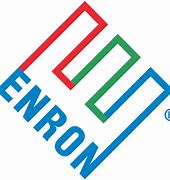

# Enron Hyperlink Prediction by NetAurHPD
Enron Corporation was an American energy, commodities, and services company based in Houston, Texas. At the end of 2001, it was revealed that Enron's reported financial condition was sustained by an creatively planned accounting fraud, known since as the Enron scandal. Enron has become synonymous with willful corporate fraud and corruption.

### Data
The simplices in this dataset are constructed from the Enron email dataset, each simplex corresponds to an email. The data stpred in two files:

- nverts.txt -> [2, 3, 2, 2, 2,...]

- simplices.txt -> [4, 1, 117, 129, 1, 51, 1,...]

**Meaning**:

Hyperlink 1 = {4,1}

Hyperlink 2 = {117,129,1}

Hyperlink 3 = {51,1}

In [ ]:
import sys
import os

In [ ]:
sys.path.append(os.path.abspath("../..")) 

In [ ]:
from Examples.data_preprocess import data_preprocess, create_train_and_test_sets
from NetAurHPD.predict_by_M5 import predict
from NetAurHPD.network_auralization import network_auralization_from_graph
from NetAurHPD.hyperlinks_waveforms import nodes_to_hyperlink
from Examples.utils import clique_expansion_transformation, negative_sampling, save_hyperlinks_with_label
import torch

Data files path

In [ ]:
nodes_data_dir = "enron_data/email-Enron-simplices.txt"
groups_size_data_dir = "enron_data/email-Enron-nverts.txt"

Load data and transform into hypergraph

In [ ]:
unique_hyperlink_dict = data_preprocess(nodes_data_dir, groups_size_data_dir)

Present the Hypergraph as Clique expansion graph

In [ ]:
G = clique_expansion_transformation(unique_hyperlink_dict, True)

Create nodes index by order in G

In [ ]:
G_nodes_mapping = {}
for i in G.nodes():
    G_nodes_mapping[i] = len(G_nodes_mapping)

Run network auralization - get signal to each node

In [ ]:
signal = network_auralization_from_graph(G)

Save positive hyperlinks with positive label

In [ ]:
positive_hyperlink_dict = save_hyperlinks_with_label(unique_hyperlink_dict)

Negative sampling - create negative hyperlinks examples

In [ ]:
negative_hyperlink_dict = negative_sampling(G,unique_hyperlink_dict)

Create train and test sets

In [ ]:
train_hyperlink_dict, y_train, test_hyperlink_dict, y_test = create_train_and_test_sets(positive_hyperlink_dict, negative_hyperlink_dict)

Pooling - mean nodes waveforms into hyperlinks

In [ ]:
train_hyperlinks_waveforms = nodes_to_hyperlink(signal, train_hyperlink_dict, G_nodes_mapping)
test_hyperlinks_waveforms = nodes_to_hyperlink(signal, test_hyperlink_dict, G_nodes_mapping)

Train Classifier - M5 model

In [ ]:
predict(train_hyperlinks_waveforms, y_train, test_hyperlinks_waveforms, y_test)